In [1]:
from osgeo import gdal
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import pandas as pd

%matplotlib inline
#rcParams['figure.figsize'] = (10,7.5)

In [2]:
stations = pd.read_csv('../datos/Stations_Info.csv', index_col = 0)

In [ ]:
plt.figure

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-380706.6996369655,2114030.0354140634,-304052.2035350525,2189220.929094869&bboxSR=2025&imageSR=2025&size=1500,1471&dpi=96&format=png32&transparent=true&f=image


AttributeError: 'Basemap' object has no attribute 'set_xticks'

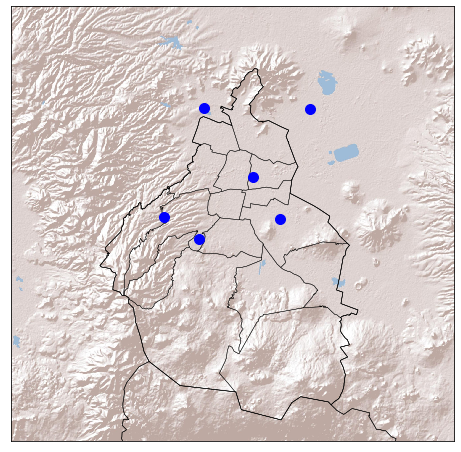

In [5]:
plt.figure(figsize = (8,8))
my_map = Basemap(llcrnrlon=-99.5, llcrnrlat=19,urcrnrlon=-98.8, urcrnrlat=19.7, epsg = 2025)
#http://server.arcgisonline.com/arcgis/rest/services

my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 0.4)
        
        
lons = []
lats = []
labels = ['SFE', 'MER', 'PED', 'SAG', 'TLA', 'UIZ']
for label in labels:
    
    lons.append(stations.loc[label]['Longitud'])
    lats.append(stations.loc[label]['Latitud'])
    
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
my_map.set_xticks()

for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+1000, ypt+500, label)
    
plt.savefig('../graficas/maps/stations_analized', dpi = 200)

In [9]:
import h5py
path2wrf = '/Volumes/BUFFALO_SOLDIER/datos_VC/'

In [10]:
file_24 = h5py.File(path2wrf + '01/jan_24.h5', 'r')

In [11]:
vc_24 = np.array(file_24.get('vc_24h'))

In [12]:
vc_24.shape

(17, 24, 102, 128)

In [6]:
xlat = np.loadtxt('../datos/xlat_d02_interpolado.txt')
xlong = np.loadtxt('../datos/xlong_d02_interpolado.txt')

In [13]:
xlat.shape

(102, 128)

In [56]:
cdmx = np.loadtxt('../datos/maps/EstadosMX/CDMX.xy')
edomx = np.loadtxt('../datos/maps/EstadosMX/EdoMexico.xy')
mor = np.loadtxt('../datos/maps/EstadosMX/Morelos.xy')

In [26]:
vc_24_rs = vc_24[0,14,:,:].reshape(102 * 128)

In [51]:
xlat_rs = xlat.reshape(102 * 128)
xlong_rs = xlong.reshape(102 * 128)

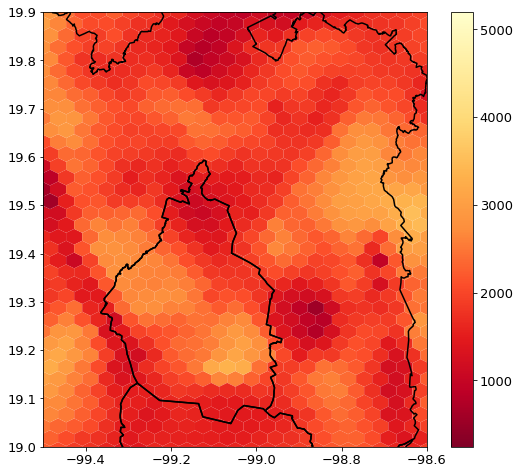

In [68]:
plt.rcParams.update({'font.size': 13})
fig = plt.figure(figsize=(8.6,8))
ax = plt.subplot()
im = ax.hexbin(xlong_rs, xlat_rs, C = vc_24_rs,gridsize= 80, alpha = 1, linewidths=0, cmap='YlOrRd_r')
ax.plot(cdmx[:,0], cdmx[:,1], c = 'k')
ax.plot(edomx[:,0], edomx[:,1], c = 'k')
ax.plot(mor[:,0], mor[:,1], c = 'k')
ax.set_ylim(19, 19.9)
ax.set_xlim(-99.5, -98.6)
fig.colorbar(im)

(-99.5, -98.6)

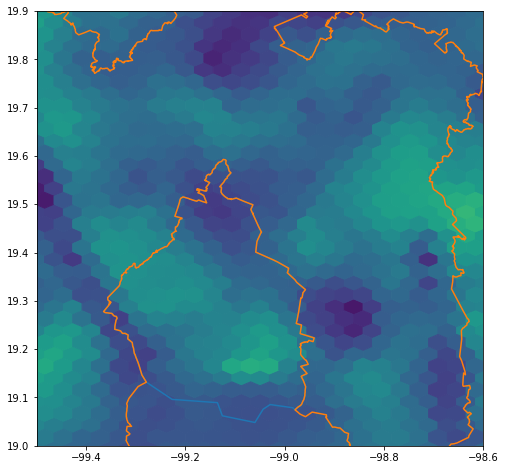

In [42]:
plt.figure(figsize = (8,8))
plt.hexbin(xlong_rs, xlat_rs, C = vc_24_rs,gridsize= 80)
plt.plot(cdmx[:,0], cdmx[:,1])
plt.plot(edomx[:,0], edomx[:,1])
plt.ylim(19, 19.9)
plt.xlim(-99.5, -98.6)

In [69]:
a = "../datos/max_min_anual/{}.pgkf{}" 

In [70]:
a.format('11', 7)

'../datos/max_min_anual/11.pgkf7'

In [ ]:
np.lo

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-545867.5088745821,1980070.4416004047,-194318.23254734272,2341316.247423459&bboxSR=2025&imageSR=2025&size=1500,1541&dpi=96&format=png32&transparent=true&f=image


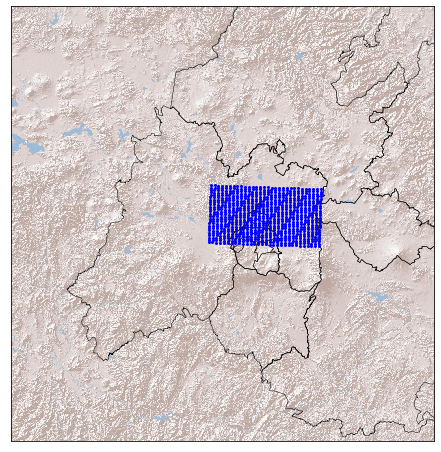

In [8]:
plt.figure(figsize = (8,8))
my_map = Basemap(llcrnrlon=-101, llcrnrlat=17.74,urcrnrlon=-97.8, urcrnrlat=21.1, epsg = 2025)
#http://server.arcgisonline.com/arcgis/rest/services

my_map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

my_map.readshapefile('../datos/maps/entidades/INEGI_Entidad_', 'INEGI_Entidad_')
my_map.readshapefile('../datos/maps/entidades/INEGI_Municipio_', 'INEGI_Municipio_', drawbounds=False)


for info, shape in zip(my_map.INEGI_Municipio__info, my_map.INEGI_Municipio_):
    if info['NOMBRE'][:6] == 'Ciudad':
        x, y = zip(*shape) 
        my_map.plot(x, y, marker=None, c = 'k', linewidth = 0.4)
        

    
x,y = my_map(xlong[50:80, 30:55].reshape(30*25), xlat[50:80, 30:55].reshape(30*25))
my_map.plot(x, y, 'bo', markersize=2)


In [26]:
xlong[50:80, 30:55].shape

(30, 25)

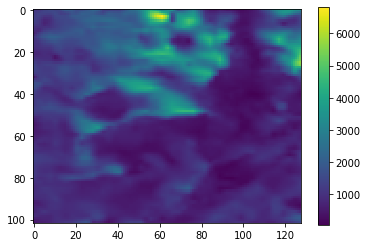

In [11]:
plt.imshow(vc_24[16, 11, :, :])
plt.colorbar()

In [17]:
vc_24[:, 11, :, :].shape

(17, 102, 128)

In [21]:
monthly_max = np.zeros_like(vc_24[:12, 0, :,:])
monthly_min = np.zeros_like(vc_24[:12, 0, :,:])

annual_max = np.zeros_like(vc_24[0, :,:])
annual_min = np.zeros_like(vc_24[0, :,:])

In [23]:
for t in range(0,12):
    
    file_24 = h5py.File(path2wrf + '01/jan_24.h5', 'r')
    vc_24 = np.array(file_24.get('vc_24h'))

    for i in range(0, 102):
        for j in range(0,128):

            monthly_max[0, i, j] = vc_24[:, 11, i, j].max()
            monthly_min[0, i, j] = vc_24[:, 11, i, j].min()
        
        

In [24]:
monthly_max[0, :, :]

array([[1569, 1548, 1526, ..., 5517, 5629, 5741],
       [1625, 1649, 1673, ..., 5727, 5851, 5975],
       [1644, 1672, 1700, ..., 5930, 6051, 6173],
       ...,
       [9622, 9142, 8662, ..., 2135, 2195, 2255],
       [9651, 9209, 8767, ..., 2063, 2081, 2099],
       [9597, 9246, 8894, ..., 1898, 1892, 1885]])

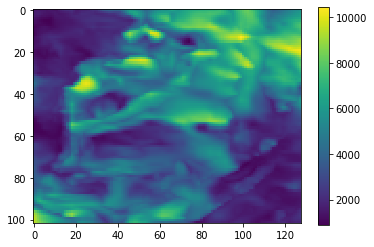

In [25]:
plt.imshow(monthly_max[0, :, :])
plt.colorbar()

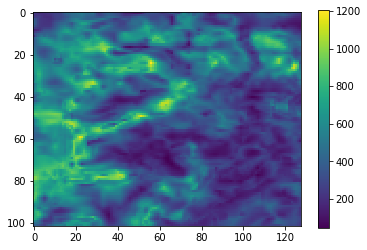

In [26]:
plt.imshow(monthly_min[0, :, :])
plt.colorbar()